In [45]:
# Импорт библиотек
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment

In [46]:
# Настройка CometML
import sys
sys.path.append('c:/projects/configs/')
from config_comet_ml import api_key, project_name, workspace

# Создайте эксперимент с помощью API ключа
experiment = Experiment(
    api_key=api_key,
    project_name=project_name,
    workspace=workspace,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/f999145/medical-appointment/dc1bac5eec5945598f1ac461d8db9b1f



In [47]:
df = pd.read_csv('data/KaggleV2-May-2016.zip')
df.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)
num_df = df.select_dtypes(include=('int', 'float'))
num_df.nunique()

Age             104
Scholarship       2
Hipertension      2
Diabetes          2
Alcoholism        2
Handcap           5
SMS_received      2
dtype: int64

5 из 7 признаков имеют бинарные переменные.
Так как не все признаки бинарные применяем кореляцию Пирсона

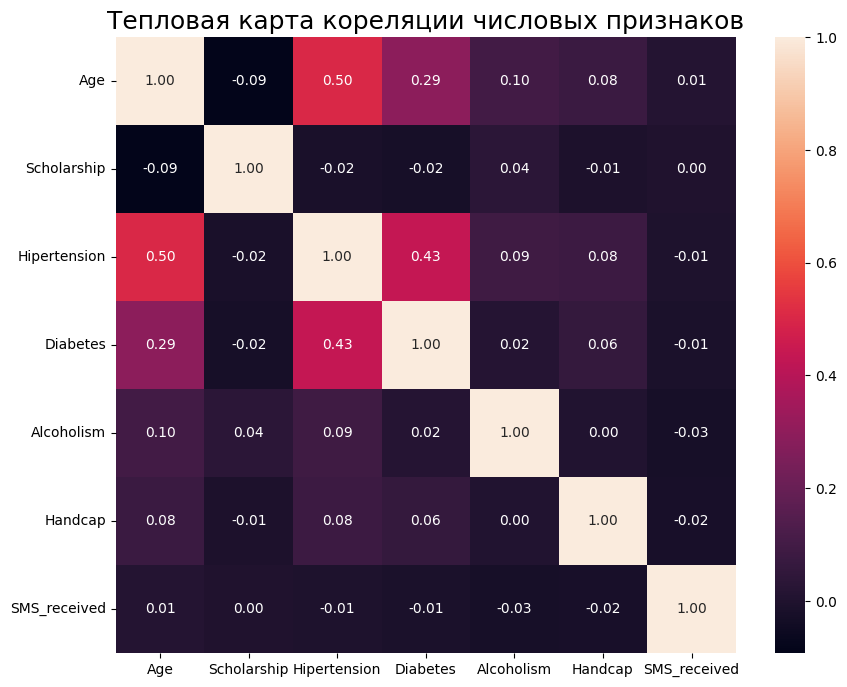

In [48]:
fg, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    num_df.corr(),
    fmt='0.2f',
    annot=True
)
ax.set_title('Тепловая карта кореляции числовых признаков', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
experiment.log_figure(figure=plt)
plt.show()

По графику видно, что:
* очень слабая связь между диабетом и возрастом.
* слабая связь между гипертонитом и диабетом, а также между гипертонитом и возрастом.
* в остальных случаях связь отсутствует.


In [49]:
experiment.display()

In [50]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/f999145/medical-appointment/dc1bac5eec5945598f1ac461d8db9b1f
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET INFO: Please wait for metadata to finish uploading (timeout is 3600 seconds)
